# SEA-AD: Exploratory Data Analysis (EDA)

**Project:** Brain GNN Transcriptomics  
**Goal:** Visualize single-cell RNA-seq data from the **Seattle Alzheimer’s Disease Brain Cell Atlas (SEA-AD)**.

## Steps
1. Load processed SEA-AD data (`sea_ad_proc.h5ad`)
2. Visualize Quality Control metrics
3. Dimensionality Reduction (PCA, UMAP)
4. Cell Type & Pathology Distribution

In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

### 1. Load Data
Loading the processed SEA-AD file generated by `scripts/preprocess_scRNA.py`.

In [2]:
data_path = '../data/processed/sea_ad_proc.h5ad'
if not os.path.exists(data_path):
    print(f"File not found: {data_path}. Run scripts/preprocess_scRNA.py first.")
else:
    adata = sc.read_h5ad(data_path)
    print(adata)

AnnData object with n_obs × n_vars = 8378 × 2000
    obs: 'library_prep', 'Donor ID', 'Method', 'Sex', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'Hispanic/Latino', 'Years of education', 'PMI', 'APOE Genotype', 'Thal', 'Braak', 'CERAD', 'ADNC', 'LATE', 'Highest Lewy Body Disease', 'Cognitive Status', 'Class', 'Subclass', 'Supertype', 'percent 6e10 positive area', 'percent AT8 positive area', 'percent NeuN positive area', 'percent GFAP positive area', 'percent aSyn positive area', 'percent pTDP43 positive area', 'cell_type', 'diagnosis', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means',

### 2. UMAP Visualization
Visualize cell types and diagnosis.

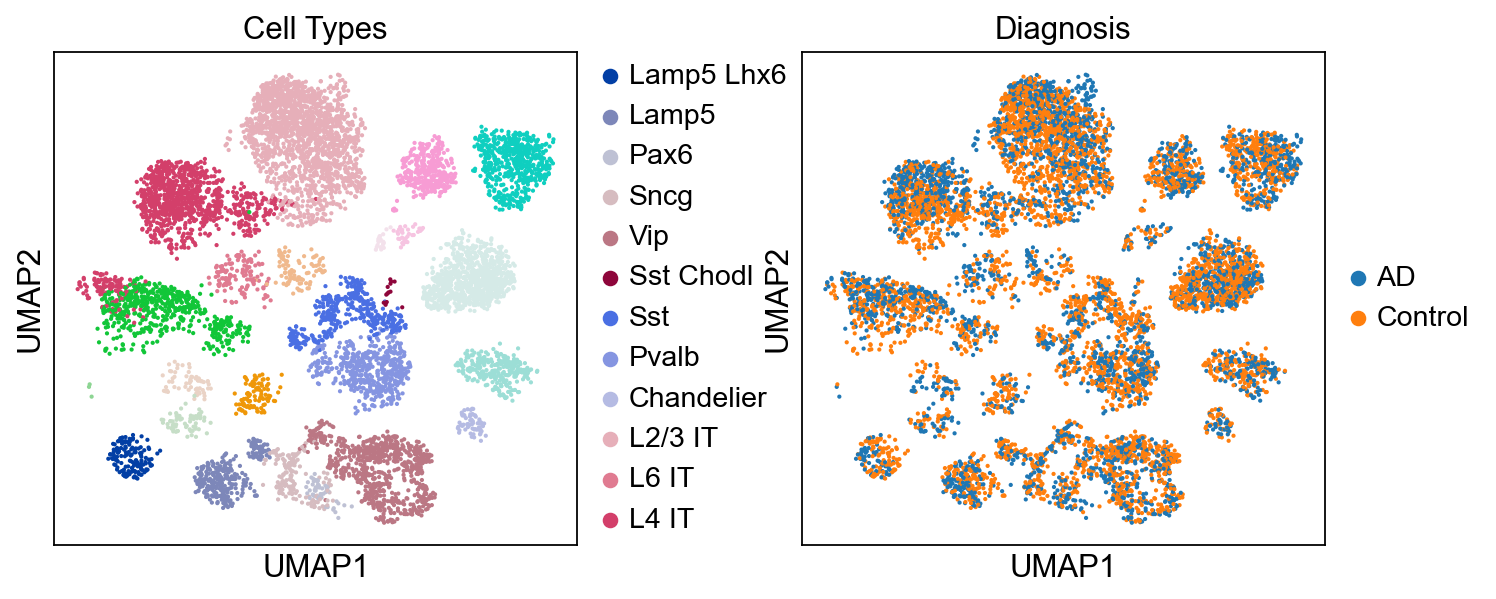

In [3]:
if 'X_umap' not in adata.obsm:
    print("Computing UMAP...")
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
    sc.tl.umap(adata)

sc.pl.umap(adata, color=['cell_type', 'diagnosis'], wspace=0.3, title=['Cell Types', 'Diagnosis'])

### 3. Metadata Stats

In [4]:
print("Cell Type Distribution:")
print(adata.obs['cell_type'].value_counts())
print("\nDiagnosis Distribution:")
print(adata.obs['diagnosis'].value_counts())

Cell Type Distribution:
cell_type
L2/3 IT            1809
L4 IT              1095
Oligodendrocyte     874
Vip                 735
Astrocyte           567
L5 IT               560
Pvalb               514
Sst                 365
Microglia-PVM       336
Lamp5               305
OPC                 284
Sncg                165
Lamp5 Lhx6          140
L6 IT               126
L5/6 NP             100
L6 IT Car3           90
L6b                  63
Chandelier           62
L6 CT                62
Pax6                 52
VLMC                 35
Endothelial          22
Sst Chodl            14
L5 ET                 3
Name: count, dtype: int64

Diagnosis Distribution:
diagnosis
Control    4692
AD         3686
Name: count, dtype: int64
